In [224]:
# Importing dependencies
import matplotlib.pyplot as plt
import numpy as np
from numpy import absolute
import pandas as pd
import seaborn as sns
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import xgboost
from xgboost import XGBRegressor
import tensorflow as tf
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.10.0


In [453]:
# Reading in the data
data = pd.read_csv('C:\\Users\\John\\Documents\\Berkeley\\Classwork\\group project\\data\\Albert_cleaned_sets\\mega_merged.csv', index_col=0)

In [454]:
data.head(10)

,State,Year,Population,Number of Cannabis Users,Number of Opioid Deaths,Per Capita Cannabis Use,Per Capita Opioid Deaths,Recreational,Rec Year Legalized,Medical,Med Year Legalized,Years legal (rec),Years legal (med)
0,Total U.S.,2014,318386329,34038000,47055,0.106908,0.000148,0,0,0,0,0,0
1,Total U.S.,2015,320738994,35584000,52404,0.110944,0.000163,0,0,0,0,0,0
2,Total U.S.,2016,323071755,36806000,63450,0.113925,0.000196,0,0,0,0,0,0
3,Total U.S.,2017,325122128,39252000,70237,0.120730,0.000216,0,0,0,0,0,0
4,Total U.S.,2018,326838199,42211000,56144,0.129150,0.000172,0,0,0,0,0,0
5,Total U.S.,2019,328329953,45865000,70630,0.139692,0.000215,0,0,0,0,0,0
6,Total U.S.,2020,329484123,48938000,91799,0.148529,0.000279,0,0,0,0,0,0
7,North Dakota,2014,738736,62000,43,0.083927,0.000058,0,0,1,2016,0,6
8,North Dakota,2015,755537,61000,61,0.080737,0.000081,0,0,1,2016,0,6
9,North Dakota,2016,756114,61000,77,0.080676,0.000102,0,0,1,2016,0,6


In [455]:
# Dropping first 7 rows being country summation.
data = data.iloc[7:]

In [456]:
# Checking for null values
data.isna().sum()

State                       0
Year                        0
Population                  0
Number of Cannabis Users    0
Number of Opioid Deaths     0
Per Capita Cannabis Use     0
Per Capita Opioid Deaths    0
Recreational                0
Rec Year Legalized          0
Medical                     0
Med Year Legalized          0
Years legal (rec)           0
Years legal (med)           0
dtype: int64

In [457]:
# Checking datatypes
data.dtypes

State                        object
Year                          int64
Population                    int64
Number of Cannabis Users      int64
Number of Opioid Deaths       int64
Per Capita Cannabis Use     float64
Per Capita Opioid Deaths    float64
Recreational                  int64
Rec Year Legalized            int64
Medical                       int64
Med Year Legalized            int64
Years legal (rec)             int64
Years legal (med)             int64
dtype: object

In [458]:
# Label encoding
le = preprocessing.LabelEncoder()
data.State = le.fit_transform(data.State)

In [459]:
# Sorthing the data based on the Year feature, resetting the index, and dropping the old index
data = data.sort_values('Year')
data = data.reset_index()
data.drop(columns=['index'], inplace = True)

In [232]:
data

,State,Year,Population,Number of Cannabis Users,Number of Opioid Deaths,Per Capita Cannabis Use,Per Capita Opioid Deaths,Recreational,Rec Year Legalized,Medical,Med Year Legalized,Years legal (rec),Years legal (med)
0,34,2014,738736,62000,43,0.083927,0.000058,0,0,1,2016,0,6
1,25,2014,6059130,639000,1067,0.105461,0.000176,0,0,1,2018,0,4
2,16,2014,2901861,259000,332,0.089253,0.000114,0,0,0,0,0,0
3,18,2014,4645938,425000,777,0.091478,0.000167,0,0,1,2015,0,7
4,37,2014,3965447,649000,522,0.163664,0.000132,1,2014,1,1998,8,24
5,42,2014,6544617,560000,1269,0.085567,0.000194,0,0,0,0,0,0
6,32,2014,19653431,2372000,2300,0.120691,0.000117,1,2021,1,2014,1,8
7,7,2014,933131,109000,189,0.116811,0.000203,0,0,1,2011,0,11
8,13,2014,12885092,1305000,1705,0.101280,0.000132,1,2019,1,2013,3,9
9,2,2014,6732873,752000,1211,0.111691,0.000180,1,2020,1,2010,2,12


In [233]:
# Setting pandas dataframe display options to unlimited viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [234]:
# Creating train and test sets
train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)

In [235]:
# Checking overview stats
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
State,278.0,2.471942e+01,1.468172e+01,0.000000,1.200000e+01,2.500000e+01,3.700000e+01,5.000000e+01
Year,278.0,2.016932e+03,2.012328e+00,2014.000000,2.015000e+03,2.017000e+03,2.019000e+03,2.020000e+03
Population,278.0,6.392004e+06,7.017369e+06,579994.000000,1.797936e+06,4.561594e+06,7.391041e+06,3.943761e+07
Number of Cannabis Users,278.0,7.918849e+05,9.356084e+05,51000.000000,2.177500e+05,4.970000e+05,1.005000e+06,7.133000e+06
Number of Opioid Deaths,278.0,1.328428e+03,1.389940e+03,43.000000,3.267500e+02,8.585000e+02,1.832000e+03,8.908000e+03
Per Capita Cannabis Use,278.0,1.271769e-01,3.854039e-02,0.070898,1.002226e-01,1.152630e-01,1.445892e-01,2.566789e-01
Per Capita Opioid Deaths,278.0,2.107136e-04,9.467359e-05,0.000045,1.421658e-04,1.909676e-04,2.622890e-04,5.948239e-04
Recreational,278.0,3.884892e-01,4.882858e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Rec Year Legalized,278.0,7.839029e+02,9.852767e+02,0.000000,0.000000e+00,0.000000e+00,2.016000e+03,2.022000e+03
Medical,278.0,7.841727e-01,4.121370e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [236]:
# Creating new variables to layer data for manipulation
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Number of Opioid Deaths')
test_labels = test_features.pop('Number of Opioid Deaths')



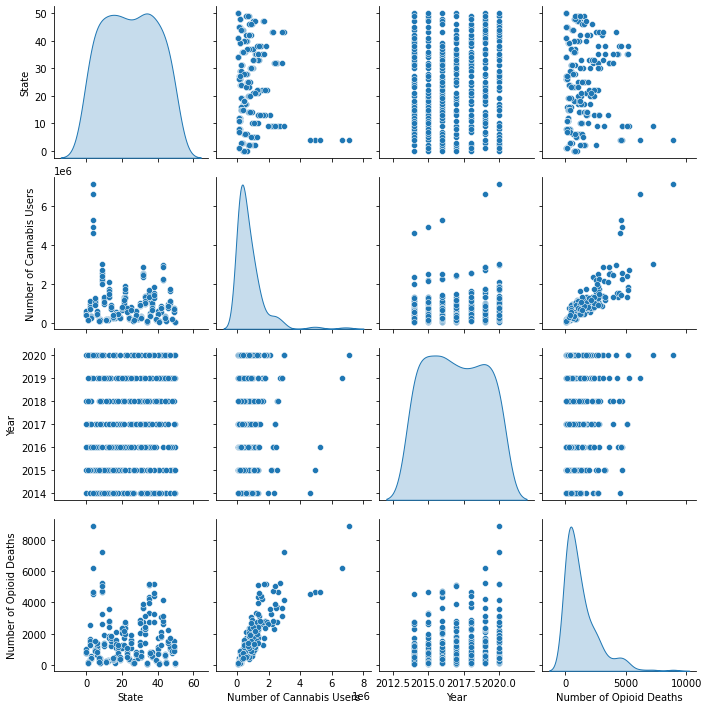

In [237]:
sns.pairplot(train_dataset[['State','Number of Cannabis Users','Year','Number of Opioid Deaths']], diag_kind='kde')

In [238]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [239]:
normalizer.adapt(np.array(train_features))

In [240]:
#Linear Regression

In [241]:
cannabis_use = np.array(train_features['Number of Cannabis Users'])

In [242]:
cannabis_use_normalizer = layers.Normalization(input_shape=[1,], axis=None)
cannabis_use_normalizer.adapt(cannabis_use)

In [243]:
cannabis_use_model = tf.keras.Sequential([
    cannabis_use_normalizer,
    layers.Dense(units=1)
])

In [244]:
cannabis_use_model.predict(cannabis_use[:10])

1/1 [==============================] - 0s 32ms/step


array([[-1.615],
       [ 0.712],
       [ 0.747],
       [ 0.747],
       [-1.452],
       [-0.104],
       [ 0.757],
       [-1.803],
       [ 0.593],
       [ 0.35 ]], dtype=float32)

In [245]:
cannabis_use_model.compile(
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.1),
    loss='mean_absolute_error')

In [246]:
%%time
history = cannabis_use_model.fit(
    train_features['Number of Cannabis Users'],
    train_labels,
    epochs=500,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 11.3 s


In [247]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
495,1032.718140,1288.766235,495
496,1032.365234,1288.356079,496
497,1031.984619,1287.955078,497
498,1031.601929,1287.557983,498
499,1031.240845,1287.154053,499


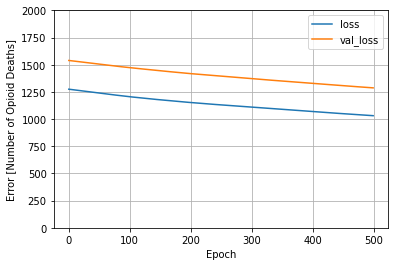

In [248]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 2000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Number of Opioid Deaths]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [250]:
test_results = {}

test_results['cannabis_use_model'] = cannabis_use_model.evaluate(
    test_features['Number of Cannabis Users'],
    test_labels, verbose=0)

In [251]:
x = tf.linspace(0, 10000000, 500000)
y = cannabis_use_model.predict(x)

15625/15625 [==============================] - 8s 532us/step


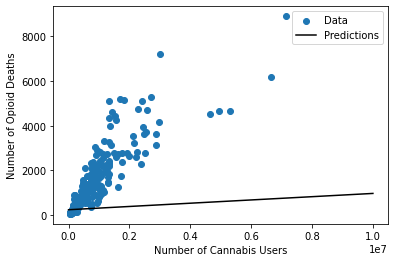

In [252]:
def plot_cannabis(x, y):
  plt.scatter(train_features['Number of Cannabis Users'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Number of Cannabis Users')
  plt.ylabel('Number of Opioid Deaths')
  plt.legend()

plot_cannabis(x, y)

In [253]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [254]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 31ms/step


array([[ 1.904],
       [ 1.367],
       [-0.789],
       [ 1.751],
       [ 1.425],
       [ 0.87 ],
       [-0.536],
       [ 0.881],
       [ 2.383],
       [-0.755]], dtype=float32)

In [255]:
linear_model.layers[1].kernel

<tf.Variable 'dense_9/kernel:0' shape=(12, 1) dtype=float32, numpy=
array([[-0.131],
       [-0.232],
       [ 0.54 ],
       [-0.334],
       [-0.212],
       [-0.564],
       [-0.25 ],
       [ 0.216],
       [ 0.297],
       [ 0.542],
       [-0.649],
       [-0.454]], dtype=float32)>

In [256]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [257]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 2.46 s


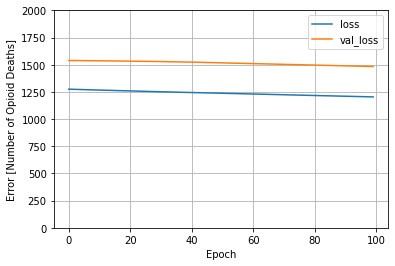

In [258]:
plot_loss(history)

In [259]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [260]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [261]:
dnn_cannabis_model = build_and_compile_model(cannabis_use_normalizer)

In [262]:
dnn_cannabis_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_10 (Dense)            (None, 64)                128       
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,244
Trainable params: 2,241
Non-trainable params: 3
_________________________________________________________________


In [263]:
# Fitting and storing model in a variable
%%time
history = dnn_cannabis_model.fit(
    train_features['Number of Cannabis Users'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=500)

Wall time: 11.5 s


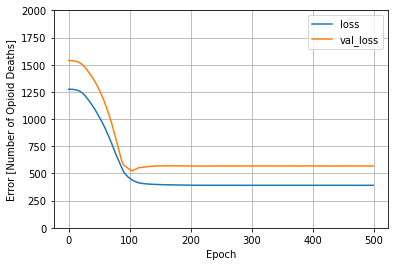

In [264]:
# Plotting loss
plot_loss(history)

In [265]:
x = tf.linspace(0, 5000000, 10000)
dnn_can_yp = dnn_cannabis_model.predict(x)

313/313 [==============================] - 0s 591us/step


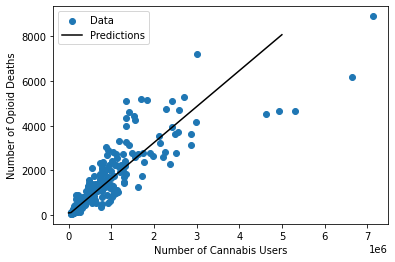

In [266]:
plot_cannabis(x, dnn_can_yp)

In [267]:
can = data['Number of Cannabis Users']
op = data['Number of Opioid Deaths']

In [268]:
test_results['dnn_cannabis_model'] = dnn_cannabis_model.evaluate(
    test_features['Number of Cannabis Users'], test_labels,
    verbose=0)

In [269]:

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_13 (Dense)            (None, 64)                832       
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,970
Trainable params: 2,945
Non-trainable params: 25
_________________________________________________________________


In [270]:
train_features

,State,Year,Population,Number of Cannabis Users,Per Capita Cannabis Use,Per Capita Opioid Deaths,Recreational,Rec Year Legalized,Medical,Med Year Legalized,Years legal (rec),Years legal (med)
6,32,2014,19653431,2372000,0.120691,0.000117,1,2021,1,2014,1,8
313,41,2020,892717,95000,0.106417,0.000093,0,0,1,2020,0,2
284,50,2019,580116,61000,0.105151,0.000136,0,0,0,0,0,0
122,34,2016,756114,61000,0.080676,0.000102,0,0,1,2016,0,6
92,43,2015,27468531,2213000,0.080565,0.000094,0,0,0,0,0,0
59,30,2015,8870312,894000,0.100786,0.000164,1,2020,1,2010,2,12
133,50,2016,585243,51000,0.087143,0.000169,0,0,0,0,0,0
219,32,2018,19544098,2556000,0.130781,0.000189,1,2021,1,2014,1,8
89,24,2015,2990231,212000,0.070898,0.000117,0,0,1,2022,0,0
65,17,2015,4429126,449000,0.101374,0.000287,0,0,0,0,0,0


In [271]:
# Creating model fit and storing as a variable.
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 2.64 s


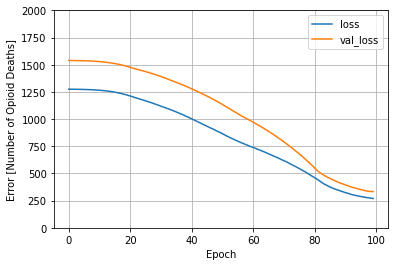

In [272]:
# Plotting loss
plot_loss(history)

In [273]:
# Storing test dnn model results in test_results df
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [274]:
# Overview of test results df
pd.DataFrame(test_results, index=['Mean absolute error [Number of Opioid Deaths]']).T

,Mean absolute error [Number of Opioid Deaths]
cannabis_use_model,935.285583
linear_model,1120.967163
dnn_cannabis_model,432.438080
dnn_model,322.944000


3/3 [==============================] - 0s 1ms/step


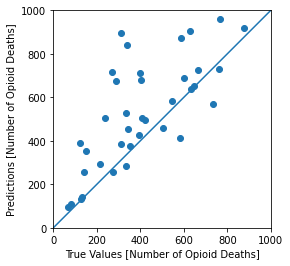

In [275]:
# Plotting True Values against predictions
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Number of Opioid Deaths]')
plt.ylabel('Predictions [Number of Opioid Deaths]')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
# Creating Plotting function for predictions against y_test

def plotGraph(y_test,y_pr,regressorName):
    if max(y_test) >= max(y_pr):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pr))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pr)), y_pr, color='red')
    plt.title(regressorName)
    plt.show()
    return

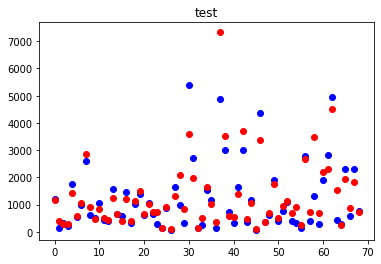

In [307]:
# Plotting predictions(red) against y_test(blue)
plotGraph(test_labels, test_predictions, "test")

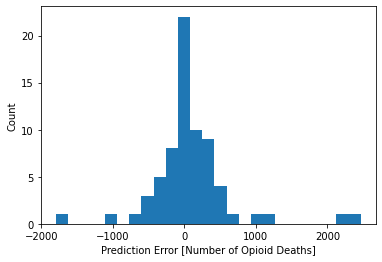

In [276]:
# Checking for prediction error 
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Number of Opioid Deaths]')
_ = plt.ylabel('Count')

In [309]:
# The dnn_model has an MAE of a little over 300. It was the best model our Neural Networking models had in store. It could be better.

In [310]:
# XGBOOST

In [476]:
# split data into input and output columns
X, y = data.drop('Number of Opioid Deaths', axis = 1), data['Number of Opioid Deaths']

In [477]:
# create an xgboost regression model
model = XGBRegressor(n_estimators=500, max_depth=50, eta=0.01, subsample=0.8, colsample_bytree=0.9, tree_method="hist", eval_metric=mean_absolute_error)

In [478]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [479]:
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 114.134 (42.699)


In [480]:
# XGBreg with KFold seems to deliver best MAE with dnn_model a close second.

In [481]:
# Splitting train and test to have X_train and X_test specifically include every year but 2019 and 2020 and y_train and y_test to exclusively carry the years 2019 and 2020. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.293, shuffle = False)

In [482]:
# fit model
model.fit(X_train, y_train, eval_set = [(X_train,y_train)])

[0]	validation_0-rmse:1659.55131	validation_0-mean_absolute_error:1169.24438
[1]	validation_0-rmse:1644.82645	validation_0-mean_absolute_error:1158.18909
[2]	validation_0-rmse:1629.29690	validation_0-mean_absolute_error:1146.95386
[3]	validation_0-rmse:1614.58079	validation_0-mean_absolute_error:1136.18518
[4]	validation_0-rmse:1600.28468	validation_0-mean_absolute_error:1125.46838
[5]	validation_0-rmse:1585.40288	validation_0-mean_absolute_error:1114.54102
[6]	validation_0-rmse:1572.07868	validation_0-mean_absolute_error:1104.62280
[7]	validation_0-rmse:1558.32244	validation_0-mean_absolute_error:1094.12476
[8]	validation_0-rmse:1544.33968	validation_0-mean_absolute_error:1083.84106
[9]	validation_0-rmse:1530.82763	validation_0-mean_absolute_error:1073.80640
[10]	validation_0-rmse:1517.39939	validation_0-mean_absolute_error:1063.70349
[11]	validation_0-rmse:1504.04318	validation_0-mean_absolute_error:1053.79883
[12]	validation_0-rmse:1490.38350	validation_0-mean_absolute_error:1043.56

[107]	validation_0-rmse:648.79206	validation_0-mean_absolute_error:431.54248
[108]	validation_0-rmse:643.06845	validation_0-mean_absolute_error:427.54120
[109]	validation_0-rmse:637.45156	validation_0-mean_absolute_error:423.62625
[110]	validation_0-rmse:632.07794	validation_0-mean_absolute_error:419.76053
[111]	validation_0-rmse:626.42152	validation_0-mean_absolute_error:415.75018
[112]	validation_0-rmse:620.56493	validation_0-mean_absolute_error:411.66257
[113]	validation_0-rmse:615.31578	validation_0-mean_absolute_error:408.03317
[114]	validation_0-rmse:610.09736	validation_0-mean_absolute_error:404.30847
[115]	validation_0-rmse:604.85816	validation_0-mean_absolute_error:400.57922
[116]	validation_0-rmse:599.98729	validation_0-mean_absolute_error:396.95438
[117]	validation_0-rmse:594.70228	validation_0-mean_absolute_error:393.22156
[118]	validation_0-rmse:589.77628	validation_0-mean_absolute_error:389.54507
[119]	validation_0-rmse:584.69348	validation_0-mean_absolute_error:385.96408

[214]	validation_0-rmse:270.68734	validation_0-mean_absolute_error:163.81573
[215]	validation_0-rmse:268.63168	validation_0-mean_absolute_error:162.37311
[216]	validation_0-rmse:266.43001	validation_0-mean_absolute_error:160.88715
[217]	validation_0-rmse:264.31759	validation_0-mean_absolute_error:159.39092
[218]	validation_0-rmse:262.30159	validation_0-mean_absolute_error:157.96936
[219]	validation_0-rmse:260.25620	validation_0-mean_absolute_error:156.53404
[220]	validation_0-rmse:258.34531	validation_0-mean_absolute_error:155.20198
[221]	validation_0-rmse:256.36592	validation_0-mean_absolute_error:153.83775
[222]	validation_0-rmse:254.52155	validation_0-mean_absolute_error:152.51929
[223]	validation_0-rmse:252.51680	validation_0-mean_absolute_error:151.14462
[224]	validation_0-rmse:250.57777	validation_0-mean_absolute_error:149.77127
[225]	validation_0-rmse:248.51648	validation_0-mean_absolute_error:148.40956
[226]	validation_0-rmse:246.59650	validation_0-mean_absolute_error:147.11314

[322]	validation_0-rmse:123.10975	validation_0-mean_absolute_error:65.19672
[323]	validation_0-rmse:122.32644	validation_0-mean_absolute_error:64.69891
[324]	validation_0-rmse:121.42207	validation_0-mean_absolute_error:64.17025
[325]	validation_0-rmse:120.63137	validation_0-mean_absolute_error:63.65652
[326]	validation_0-rmse:119.75476	validation_0-mean_absolute_error:63.13831
[327]	validation_0-rmse:118.87795	validation_0-mean_absolute_error:62.62071
[328]	validation_0-rmse:118.09407	validation_0-mean_absolute_error:62.11176
[329]	validation_0-rmse:117.33312	validation_0-mean_absolute_error:61.60934
[330]	validation_0-rmse:116.44997	validation_0-mean_absolute_error:61.07782
[331]	validation_0-rmse:115.62592	validation_0-mean_absolute_error:60.57360
[332]	validation_0-rmse:114.90885	validation_0-mean_absolute_error:60.09726
[333]	validation_0-rmse:114.08987	validation_0-mean_absolute_error:59.61990
[334]	validation_0-rmse:113.34874	validation_0-mean_absolute_error:59.15818
[335]	valida

[431]	validation_0-rmse:60.34628	validation_0-mean_absolute_error:27.85583
[432]	validation_0-rmse:59.94143	validation_0-mean_absolute_error:27.61873
[433]	validation_0-rmse:59.56112	validation_0-mean_absolute_error:27.40265
[434]	validation_0-rmse:59.19546	validation_0-mean_absolute_error:27.19844
[435]	validation_0-rmse:58.81836	validation_0-mean_absolute_error:27.00800
[436]	validation_0-rmse:58.42515	validation_0-mean_absolute_error:26.79953
[437]	validation_0-rmse:58.07841	validation_0-mean_absolute_error:26.60390
[438]	validation_0-rmse:57.73576	validation_0-mean_absolute_error:26.41413
[439]	validation_0-rmse:57.34687	validation_0-mean_absolute_error:26.21685
[440]	validation_0-rmse:57.07829	validation_0-mean_absolute_error:26.05683
[441]	validation_0-rmse:56.76132	validation_0-mean_absolute_error:25.89265
[442]	validation_0-rmse:56.44396	validation_0-mean_absolute_error:25.71846
[443]	validation_0-rmse:56.06898	validation_0-mean_absolute_error:25.52455
[444]	validation_0-rmse:5

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False, eta=0.01,
             eval_metric=<function mean_absolute_error at 0x0000016198F1EC20>,
             gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.00999999978,
             max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=50,
             max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

In [483]:
# Confining result metric lists to variables
rmse = model.evals_result()['validation_0']['rmse']
mae = model.evals_result()['validation_0']['mean_absolute_error']

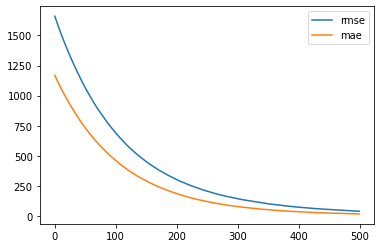

In [484]:
# plot learning curves
plt.plot(rmse, label='rmse')
plt.plot(mae, label='mae')
# show the legend
plt.legend()
# show the plot
plt.show()

In [485]:
# Wow, this model fit has incredible results for RMSE and MAE. XGBoost is quite the performer for small datasets after 500 epochs.

In [486]:
# Create predictions from X_test
y_pr = model.predict(X_test)

In [487]:
# Inspect predictions
y_pr

array([ 620.206,  862.247, 2099.239,  699.991, 2989.281, 4447.373,
         74.093,  818.89 ,  381.178,  377.063,  217.409, 1447.908,
       4282.519, 4077.215, 1457.839,  315.969, 2129.542,  355.504,
        676.515,  111.132,  642.221,  366.582, 1715.638, 2617.564,
       1668.91 ,  379.543, 1115.168, 2548.628,  435.326, 1225.555,
       2589.142,  968.385,  787.06 , 2196.391,  137.316,  317.973,
       4606.346, 1190.416, 2755.415,   75.973, 1203.51 , 1221.789,
       2175.2  ,  440.863, 3613.613,  315.223, 1621.826,  200.078,
        434.683,  123.895,  571.964,  184.55 , 2182.235,  420.152,
        352.489,  434.824,  209.166,  197.388, 1354.081,  616.25 ,
        820.947,  110.411,  381.685,  266.71 ,  459.41 , 1487.134,
        437.561, 1505.355,   91.091, 1552.039, 3319.389, 1517.331,
       2153.939, 2437.131, 4294.907, 3649.919, 2018.43 ,  388.186,
        345.282,  749.679,  586.419,   90.606, 4600.523, 2415.394,
       2824.701, 1544.282, 2081.593,  591.241, 4562.66 , 2280.

In [488]:
len(y_pr)

102

Text(0, 0.5, 'Predictions')

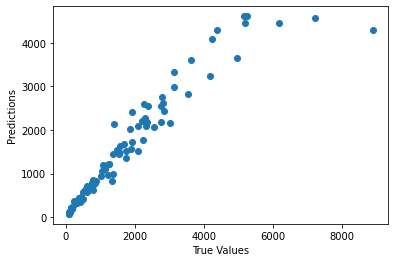

In [489]:
# Comparing y_test with y_predictions
plt.scatter(y_test, y_pr)
plt.xlabel('True Values')
plt.ylabel('Predictions')

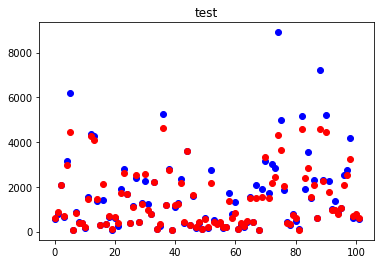

In [490]:
# Plotting data points of y_test (blue) and y_predictions (red).
plotGraph(y_test, y_pr, "test")

In [492]:
# Inserting zeros for all prior years to 2019 and 2020 to reform the length of the predictions list to comply with original dataframe.
for item in range(int(245)):
    y_pr = np.insert(y_pr, 0,0)

In [493]:
# Checking to see if length matches original dataframe.
len(y_pr)

347

In [494]:
# Storing updated y_predictions list in dataframe.
data['Opioid_death_predictions_XGBoost_2019-2020'] = y_pr
# Reversing Label Encoder to return State feature to it's original state.
data.State = le.inverse_transform(data.State)

In [495]:
# Data Overview
data

,State,Year,Population,Number of Cannabis Users,Number of Opioid Deaths,Per Capita Cannabis Use,Per Capita Opioid Deaths,Recreational,Rec Year Legalized,Medical,Med Year Legalized,Years legal (rec),Years legal (med),Opioid_death_predictions_XGBoost_2019-2020
0,North Dakota,2014,738736,62000,43,0.083927,0.000058,0,0,1,2016,0,6,0.000000
1,Missouri,2014,6059130,639000,1067,0.105461,0.000176,0,0,1,2018,0,4,0.000000
2,Kansas,2014,2901861,259000,332,0.089253,0.000114,0,0,0,0,0,0,0.000000
3,Louisiana,2014,4645938,425000,777,0.091478,0.000167,0,0,1,2015,0,7,0.000000
4,Oregon,2014,3965447,649000,522,0.163664,0.000132,1,2014,1,1998,8,24,0.000000
5,Tennessee,2014,6544617,560000,1269,0.085567,0.000194,0,0,0,0,0,0,0.000000
6,New York,2014,19653431,2372000,2300,0.120691,0.000117,1,2021,1,2014,1,8,0.000000
7,Delaware,2014,933131,109000,189,0.116811,0.000203,0,0,1,2011,0,11,0.000000
8,Illinois,2014,12885092,1305000,1705,0.101280,0.000132,1,2019,1,2013,3,9,0.000000
9,Arizona,2014,6732873,752000,1211,0.111691,0.000180,1,2020,1,2010,2,12,0.000000


In [496]:
# Store new dataframe with predictions
data.to_csv('C:\\Users\\John\\Documents\\Berkeley\\Classwork\\group project\\data\\Mega_merged_with_predictions.csv',index=False)